In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
df=pd.read_csv('master_final.csv', index_col=0)
df.head()

,Price,year,style,miles,engine,power,transmission,fuel,owners,ULEZ,CatN,doors,issue_flag,make
0,550.0,2003,Saloon,137000.0,2.2,138.0,Manual,Diesel,3,0,0,4,0,Honda
1,705.0,2003,Hatchback,106262.0,1.4,82.0,Manual,Petrol,3,0,1,5,0,Honda
2,950.0,2002,Hatchback,58000.0,1.4,89.0,Manual,Petrol,5,0,0,5,0,Honda
3,995.0,2006,Hatchback,122500.0,1.4,82.0,Manual,Petrol,3,1,0,5,0,Honda
4,995.0,2001,Hatchback,91762.0,1.6,89.0,Manual,Petrol,5,0,0,5,0,Honda


In [23]:
df.describe()

,Price,year,miles,engine,power,owners,ULEZ,CatN,doors,issue_flag
count,8.318700e+04,83187.000000,83187.000000,83187.000000,83187.00000,83187.000000,83187.000000,83187.000000,83187.000000,83187.000000
mean,1.689268e+04,2012.965439,51063.104235,1.947630,165.20362,2.085987,0.747328,0.027985,4.308245,0.014822
std,3.114361e+04,5.827887,42926.336176,0.996607,116.04986,1.371325,0.434547,0.164931,1.112469,0.120841
min,1.230000e+02,1960.000000,2.000000,0.100000,29.00000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.290000e+03,2009.000000,15427.000000,1.400000,99.00000,1.000000,0.000000,0.000000,3.000000,0.000000
50%,8.995000e+03,2015.000000,39876.000000,1.600000,130.00000,2.000000,1.000000,0.000000,5.000000,0.000000
75%,1.771500e+04,2017.000000,80151.500000,2.000000,180.00000,3.000000,1.000000,0.000000,5.000000,0.000000
max,1.395000e+06,2020.000000,900000.000000,6.800000,800.00000,17.000000,1.000000,1.000000,8.000000,1.000000


# Target distribution

count    8.318700e+04
mean     1.689268e+04
std      3.114361e+04
min      1.230000e+02
25%      3.290000e+03
50%      8.995000e+03
75%      1.771500e+04
max      1.395000e+06
Name: Price, dtype: float64
Skew:  8.57
Kurtosis:  174.93


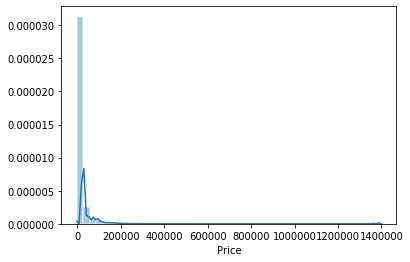

In [24]:
sns.distplot(df['Price'], hist_kws=dict(edgecolor='w',linewidth=2))
print(df['Price'].describe())
print('Skew: ', round(stats.skew(df['Price']),2))
print('Kurtosis: ', round(stats.kurtosis(df['Price']),2))

count    83187.000000
mean         8.983157
std          1.224250
min          4.820282
25%          8.098947
50%          9.104535
75%          9.782223
max         14.148406
Name: Price, dtype: float64
Skew:  0.01
Kurtosis:  -0.15


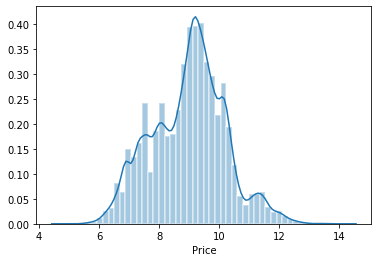

In [25]:
df['Price']=np.log1p(df['Price']) #improve relationships, more values on right to learn. 
sns.distplot(df['Price'], hist_kws=dict(edgecolor='w',linewidth=2))
print(df['Price'].describe())
print('Skew: ', round(stats.skew(df['Price']),2))
print('Kurtosis: ', round(stats.kurtosis(df['Price']),2))

# Analysis of numericals and target
Includes a couple of discrete features with an obvious ordering. 

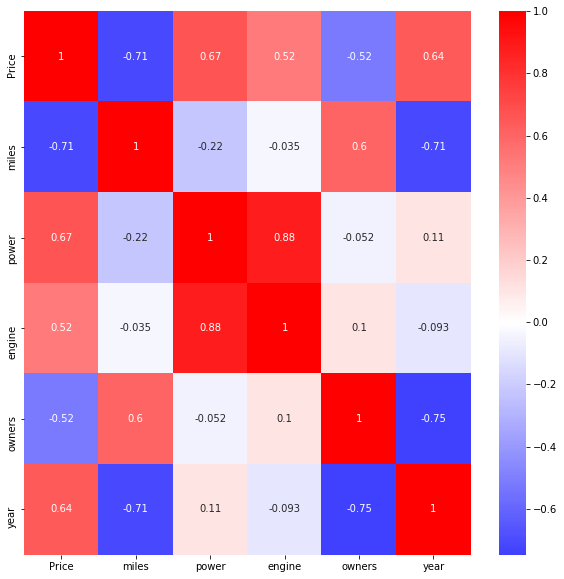

In [26]:
corr_mat=df[['Price','miles','power','engine','owners','year']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, center=0, cmap='bwr', annot=True)

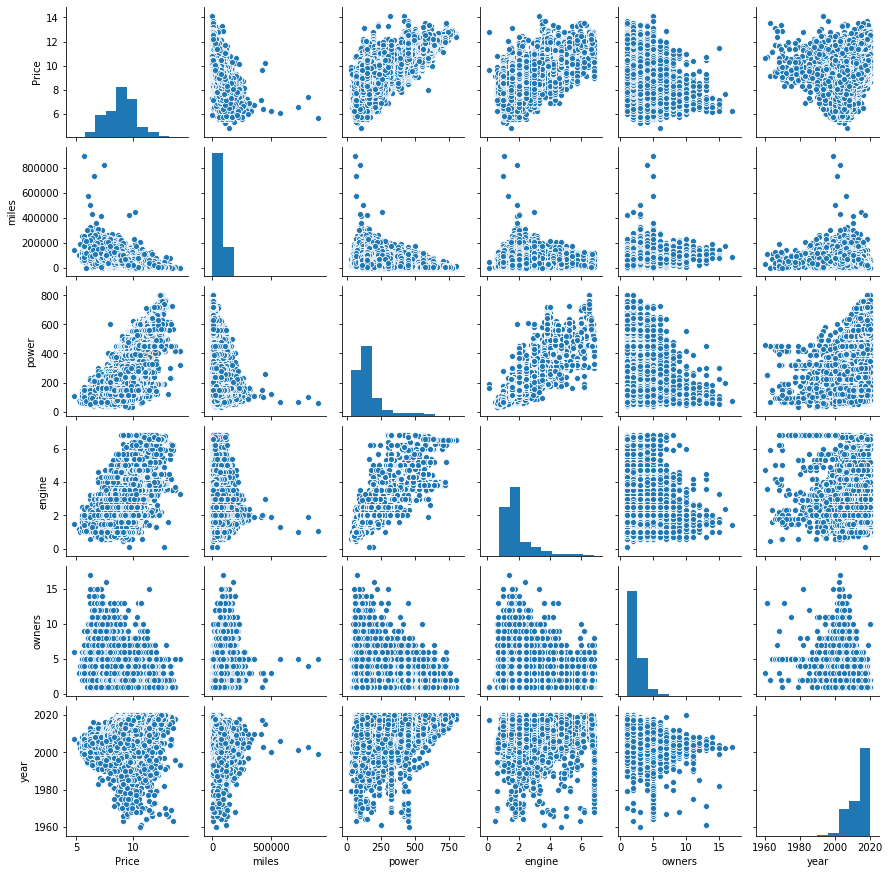

In [27]:
sns.pairplot(df[['Price','miles','power','engine','owners','year']], height=2, diag_kind='hist')

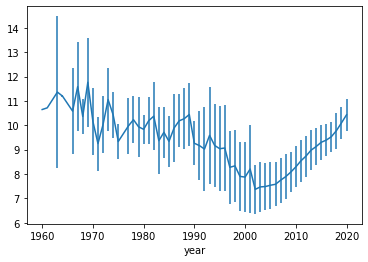

In [28]:
#price by year
df.groupby(['year'])['Price'].mean().plot.line(yerr=df.groupby(['year'])['Price'].std())

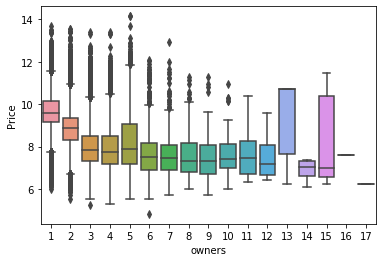

In [29]:
#owners boxplot
sns.boxplot(data=df,x='owners', y='Price')

# Categorical features 

In [30]:
pd.pivot_table(df, index = ['make'], values = ['Price','miles','power','engine','owners','year']).sort_values('Price', ascending = False)

,Price,engine,miles,owners,power,year
make,,,,,,
Lamborghini,12.016751,5.436364,12024.389091,1.916364,632.716364,2014.643636
Ferrari,11.740259,4.571072,15871.346549,2.580029,566.348018,2010.594714
McLaren,11.612158,3.836082,8330.948454,1.365979,611.216495,2016.886598
Rolls-Royce,11.441756,6.612322,34787.947867,2.530806,503.270142,2007.654028
Aston Martin,10.998771,5.250037,27720.856343,2.526119,478.343284,2010.298507
Bentley,10.911234,5.918485,34762.273249,2.980482,523.475316,2009.140069
Porsche,10.607380,3.386758,42786.063224,2.556024,370.244819,2011.279593
Maserati,10.383160,3.488750,27867.789583,1.862500,346.010417,2014.608333
Isuzu,9.788405,2.253846,41419.414201,1.349112,161.106509,2016.112426


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

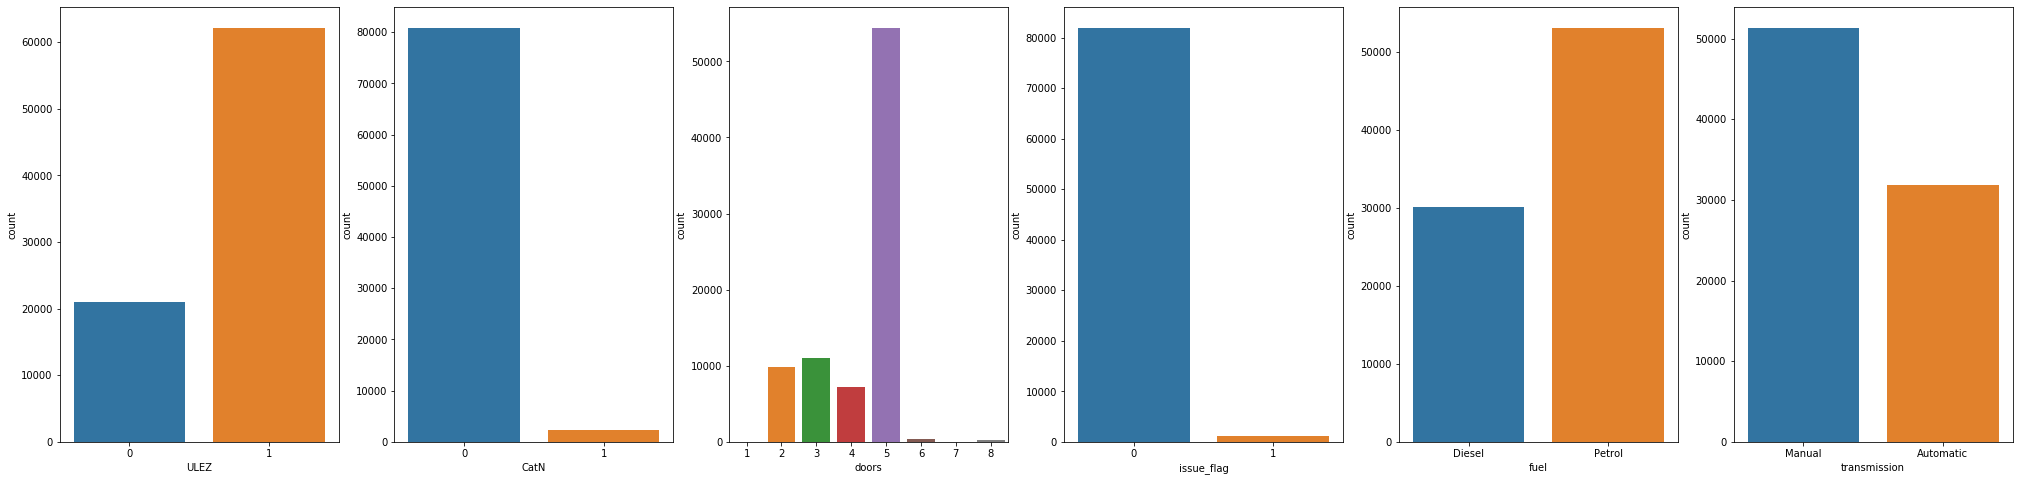

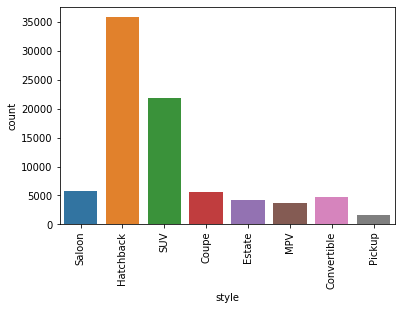

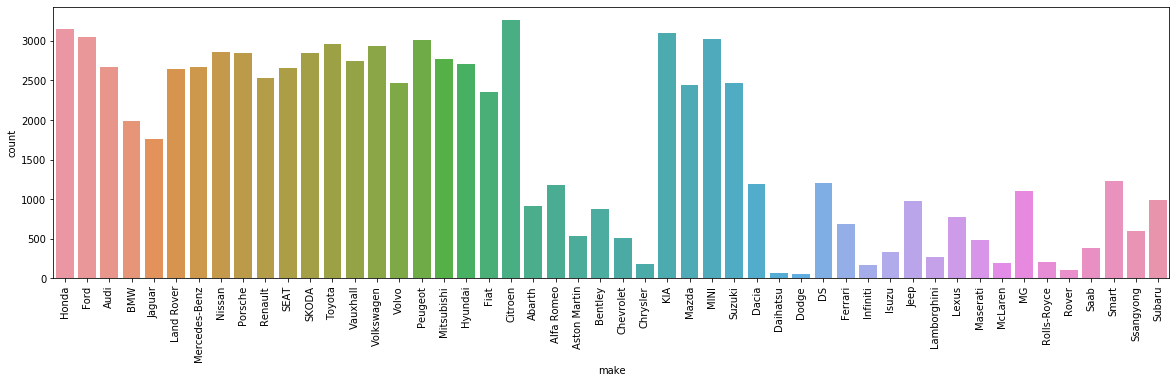

In [31]:
plt.figure(figsize=(35,8))
plt.title('Categoricals Count')
cat=['ULEZ', 'CatN', 'doors', 'issue_flag','fuel','transmission']
for col in cat:
    plt.subplot(1,6,cat.index(col)+1)
    sns.countplot(df[col])
    

plt.figure()
sns.countplot(df['style'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
sns.countplot(df['make'])
plt.xticks(rotation=90)

# Price distribution over categoricals

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

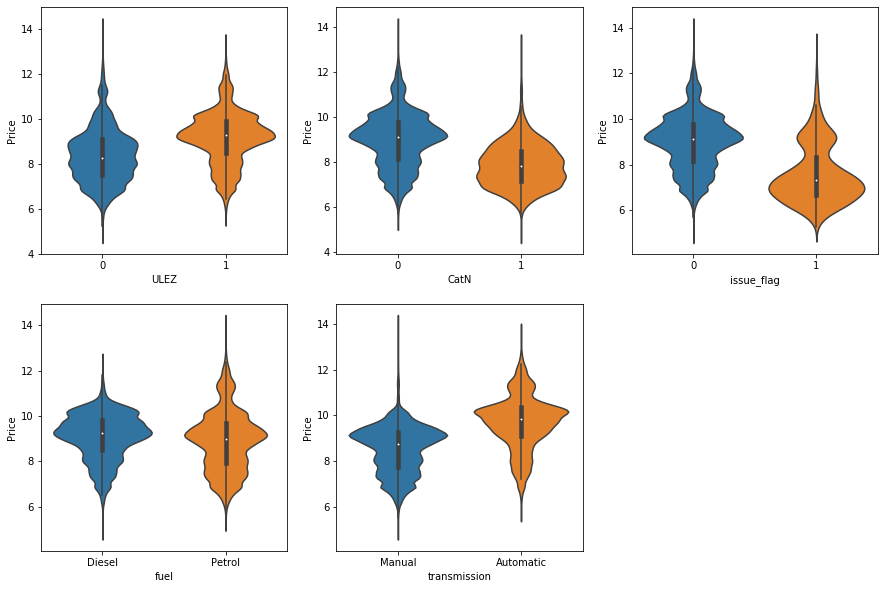

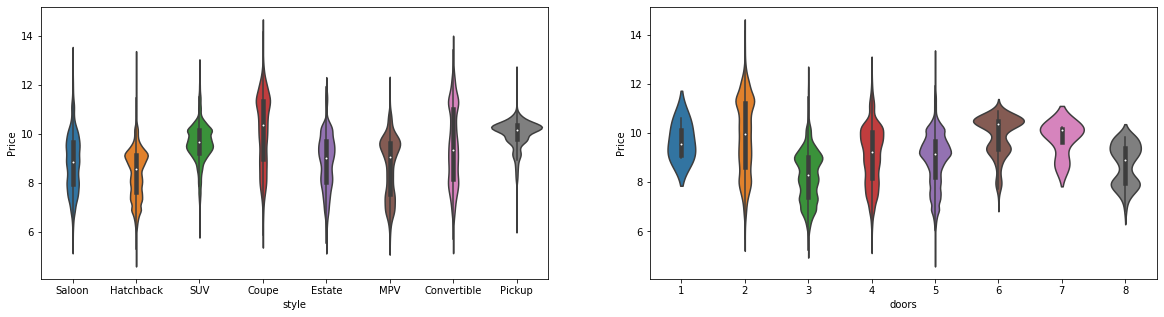

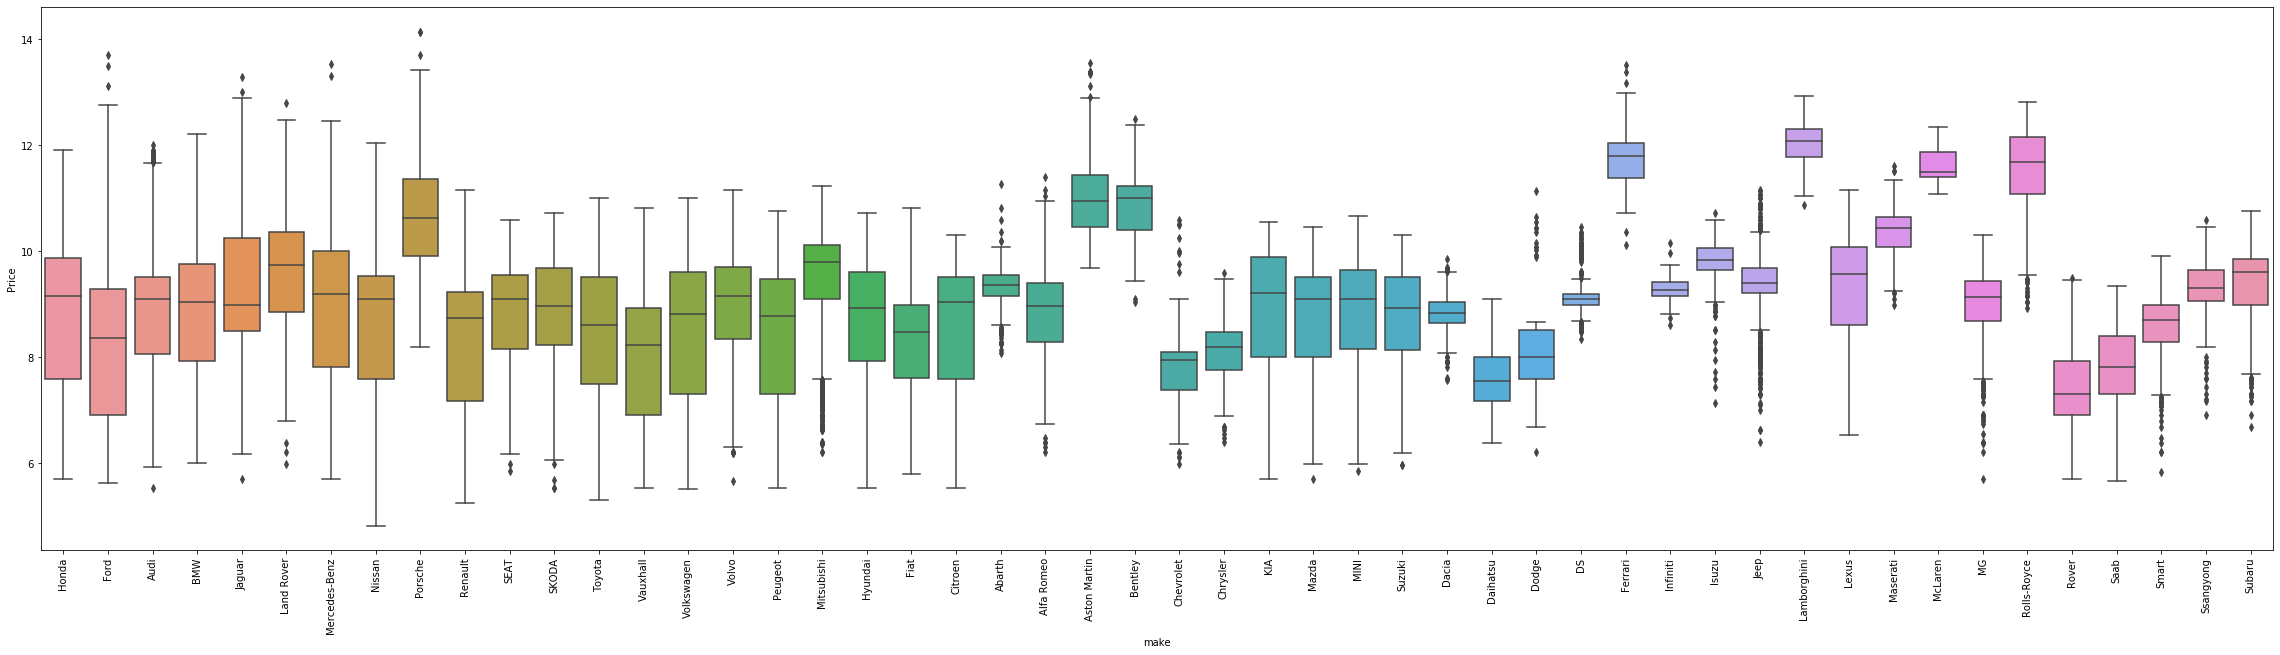

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.violinplot(data=df, x='ULEZ', y='Price')
plt.subplot(2,3,2)
sns.violinplot(data=df,x='CatN',y='Price')
plt.subplot(2,3,3)
sns.violinplot(data=df,x='issue_flag',y='Price')
plt.subplot(2,3,4)
sns.violinplot(data=df, x='fuel', y='Price')
plt.subplot(2,3,5)
sns.violinplot(data=df,x='transmission',y='Price')


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.violinplot(data=df, x='style',y='Price')
plt.subplot(1,2,2)
sns.violinplot(data=df,x='doors',y='Price')

plt.figure(figsize=(40,10))
sns.boxplot(data=df,x='make', y='Price')
plt.xticks(rotation=90)

# Significance of categoricals

In [33]:
ANOVA_results={}
for col in ['ULEZ','CatN','issue_flag','fuel', 'transmission','style','doors','make']:
    uniques=df[col].unique()
    ANOVA_results[col]=stats.f_oneway(*[df[df[col]==val].Price for val in uniques])[1]
    
for col in ['ULEZ','CatN','issue_flag','fuel', 'transmission','style','doors','make']:
    if ANOVA_results[col]>0.05:
        print(col+ ' does not show significant difference in means')
    else: 
        print(col + ' shows significant difference in means')

ULEZ shows significant difference in means
CatN shows significant difference in means
issue_flag shows significant difference in means
fuel shows significant difference in means
transmission shows significant difference in means
style shows significant difference in means
doors shows significant difference in means
make shows significant difference in means
